# Assignment 43
##  Evaluation of a Line Integral with SymPy

We will write a routine to evaluate the line integral $$\int_{C} \mathbf{A} \cdot d\mathbf{R} $$ where $$\mathbf{A}(x, y, z) = (3x^{2} + 6y)\mathbf{\hat{e}}_{x} + (14yz)\mathbf{\hat{e}}_{y} + (20xz^{2})\mathbf{\hat{e}}_{z}$$ and $$c = \{(x(t), y(t), z(t)) = (t, t^{2}, t^{3}) \ \ | \ \ 0 \leq t \leq 1\} $$

In [1]:
from sympy import *

t, x, y, z = symbols("t,x,y,z")
Px = x
Py = y
Pz = z
A = Matrix([(3 * (x**2) + 6 * y), (14 * y * z), 20 * x * (z**2)])
s = {x: t, y: t**2, z: t**3}

P = Matrix([Px, Py, Pz])

In [2]:
Px

x

In [3]:
Py

y

In [4]:
Pz

z

In [5]:
A

Matrix([
[3*x**2 + 6*y],
[      14*y*z],
[   20*x*z**2]])

In [6]:
P

Matrix([
[x],
[y],
[z]])

In [7]:
P.subs(s)

Matrix([
[   t],
[t**2],
[t**3]])

In [8]:
P.subs(s).diff()

Matrix([
[     1],
[   2*t],
[3*t**2]])

In [9]:
A.subs(s)

Matrix([
[ 9*t**2],
[14*t**5],
[20*t**7]])

In [10]:
integrand = A.subs(s).dot(P.subs(s).diff())

In [11]:
integrand

60*t**9 + 28*t**6 + 9*t**2

In [12]:
integral = integrate(integrand, (t, 0, 1))

In [13]:
integral

13

# Assignment 44
## Evaluation of Surface Integrals + Monte Carlo Methods

In [14]:
import numpy as np  # avoid mixing up SymPy and NumPy methods with the same name
import sympy as sp  # avoid mixing up SymPy and NumPy methods with the same name

x = sp.symbols("x:3")  # define tuple (x0, x1, x2) correpsonding to (x,y,z)
a = sp.Matrix(sp.symbols("a:3"))
f = sp.Matrix(sp.symbols("f:3"))
C = sp.symbols("C")
dot = lambda v1, v2: v1[0] * v2[0] + v1[1] * v2[1] + v1[2] * v2[2]
C = 12
a[0] = 36
a[1] = -12
a[2] = 3
f[0] = 2
f[1] = 3
f[2] = 4

A = sp.Matrix([a[0] * x[2], a[1] * x[0], a[2] * x[1]])  # equation of vector field A
F = f[0] * x[0] + f[1] * x[1] + f[2] * x[2]  # equation of surface S

yInTermsOfX = sp.solve(F.subs("x2", 0) - C, x[1], rational=True)[0]


def surface_integral(
    vector_field,
    equation_of_surface,
    surface_const,
    xLow=0,
    xHigh=6,
    yLow=0,
    yHigh=yInTermsOfX,
):
    gradF = sp.Matrix([F.diff(x[0]), F.diff(x[1]), F.diff(x[2])])
    n = (1 / sp.sqrt(gradF.dot(gradF))) * gradF
    Z = sp.solve((F - surface_const), x[2])[0]
    ez = sp.Matrix([0, 0, 1])
    integrand = (A.subs("x2", Z).dot(n)) / sp.Abs(n.dot(ez))
    int_y = integrate(
        integrand,
        (x[1], yLow, yHigh),
    )
    int_x = integrate(int_y, (x[0], xLow, xHigh))
    return int_x, integrand


value, integrand = surface_integral(A, F, C)

In [15]:
value

48

In [16]:
integrand

sqrt(29)*(-36*sqrt(29)*x0/29 + 12*sqrt(29)*x1/29 + 2*sqrt(29)*(-18*x0 - 27*x1 + 108)/29)/4

In [17]:
def acceptance_rejection_sample():
    point = np.random.rand(2) * np.array([6, 4])
    value = 2 * point[0] + 3 * point[1]
    return point if value <= 12.0 else ("rejected-x", "rejected-y")


points = []
N = 100000
while len(points) < N:
    point = acceptance_rejection_sample()
    if point[0] != "rejected-x":
        points.append(point)

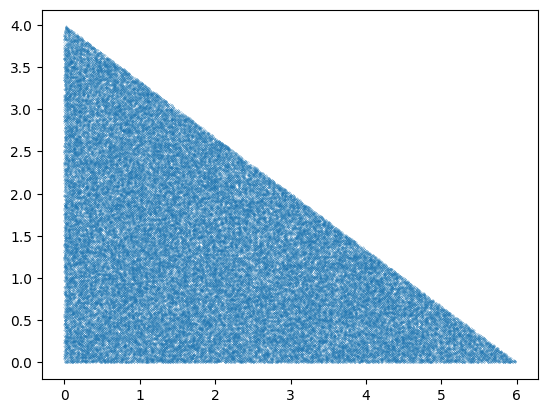

In [18]:
from matplotlib import pyplot as plt
plt.scatter(*np.array(points).T, s = 0.025) # s determines the size of the dots
plt.show()

In [19]:
f = sp.lambdify([x[0], x[1]], integrand, 'numpy')
f
f(0, 0)

54.0

In [20]:
f_vals = [f(points[i][0], points[i][1]) for i in range(len(points))]
f_bar = (1.0/len(f_vals)) * sum(f_vals)

In [21]:
f_bar

4.020681345520776

In [22]:
SE = np.sqrt(((1.0 / N) * np.sum((np.array(f_vals) - f_bar)**2)) / (N - 1))

In [23]:
SE

0.0703535454043347

In [24]:
u, v = symbols('u,v')

In [25]:
z = 3 - sp.Rational(1, 2)*u - sp.Rational(3, 4)*v

In [26]:
z

-u/2 - 3*v/4 + 3

In [27]:
integrate(z, (v, 0, 4 - Rational(2, 3) * u))

(3 - u/2)*(4 - 2*u/3) - 3*(4 - 2*u/3)**2/8

In [28]:
Volume = integrate(integrate(z, (v, 0, 4 - Rational(2, 3) * u)), (u, 0, 6))

In [29]:
Volume 

12

In [30]:
I = [Volume * f_bar - SE, Volume * f_bar + SE]

In [31]:
I

[48.1778226008450, 48.3185296916537]